In [10]:
from scipy.stats import binom
from scipy.integrate import simps, trapz, quad, cumtrapz
from scipy.misc import comb
from scipy.special import binom as bnm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Lo usaremos para Problema 2
def func_binomial(r):
    bim = bnm(33, 18)
    #print bim
    f = bim*(1-r)**(15)*r**18
    return f

 

${\bf Problema \text{ 1}}$

${\bf a)}$ Sea A y B eventos disjuntos, i.e., $A \cap B = {\emptyset} \Leftrightarrow \mathbb{P}(A\cap B) = 0$  , con probabilidad positiva ($\mathbb{P}(A),\mathbb{P}(B)>0$), $A$ y $B$ ${\bf nunca}$ pueden ser independientes ya que $\mathbb{P}(A\cap B)= \mathbb{P}(A) \mathbb{P}(B) = 0$, es decir, $\mathbb{P}(A) = 0 $ o $\mathbb{P}(B) = 0$ lo cual contradice la hipótesis de probabilidad positiva; sólo se cumple para el caso trivial en donde alguna de las probabilidades es 0 (caso trivial/nulo). 

Ahora pensando pedagógicamente, la definición de eventos ${\bf disjuntos}$ es vista en el ámbito de teoría de conjuntos, mientras que la ${\bf independencia}$ pertenece al ámbito de las probabilidades. Dos eventos disjuntos nunca pueden pasar al mismo tiempo, mientras que los independientes sí puede ser (o no, o uno sí y el otro no).

Un ejemplo astronómico para dos eventos disjuntos sería: sea $A=$ esta supernova es de tipo Ia (binarias con al menos una enana blanca) y $B=$ esta supernova es de tipo II (digamos que producto de evolución estelar de una estrella masiva); ambas teorías son viables para una supernova, pero totalmente (hasta ahora) excluyentes (= intersección vacía). 

Para eventos independientes, tomemos que $A=$ La galaxia X es una galaxia espiral y $B=$ La galaxia X está a 3 Kpc de la Tierra; ambos eventos existen por sí solos y no son excluyentes.

${\bf b)}$ Para demostrar que $A^{c} \text{ y } B^{c}$ son independientes dado que $A$ y $B$ lo son $(*)$, notemos que:

i) Sea $X=\{A,B\}$, $Y=\{B,A\}$, $X_{i}$ y $Y_{i}$ son independientes $(*)$. Demostraremos que $X_{i}^{c}$ e $Y_{i}$ lo son

\begin{align}
X_{i} &= X_{i}Y_{i}\cup X_{i}^{c}Y_{i}                \text{                             son disjuntos}\\
\rightarrow \mathbb{P}(X_{i}) &= \underbrace{\mathbb{P}(X_{i}Y_{i})}_{(*)} + \mathbb{P}(X_{i}^{c}Y_{i})\\
\rightarrow \mathbb{P}(X_{i}) &= \mathbb{P}(X_{i})\mathbb{P}(Y_{i}) + \mathbb{P}(X_{i}^{c}Y_{i}) \\
\rightarrow \mathbb{P}(X_{i}^{c}Y_{i})  &= \underbrace{ (1 - \mathbb{P}(X_{i})) }_{ \mathbb{P}(X_{i}^{c}) \text{ por def.}}\mathbb{P}(Y_{i})\\
\rightarrow \mathbb{P}(X_{i}^{c}Y_{i}) &= \mathbb{P}(X_{i}^{c})\mathbb{P}(Y_{i})\\
\end{align}

Por ende, $\{A^{c},B\}$ y $\{B^{c},A\}$ son independientes $(**)$.

ii) Ahora mostremos que $A^{c}$ y $B^{c}$ son independientes:
\begin{align}
A^{c} &= A^{c}B^{c}\cup A^{c}B  \text{ ${\bf disjuntos}$}\\
\rightarrow \mathbb{P}(A^{c}) &= \mathbb{P}(A^{c}B^{c}) + \underbrace{\mathbb{P}(A^{c}B)}_{\mathbb{P}(A^{c})\mathbb{P}(B) \text{ por i)} }\\
\rightarrow \mathbb{P}(A^{c}B^{c}) &= \underbrace{(1-\mathbb{P}(B))}_{\mathbb{P}(B^{c})} \mathbb{P}(A^{c}) \\
\rightarrow \mathbb{P}(A^{c}B^{c}) &= \mathbb{P}(A^{c})\mathbb{P}(B^{c})
\end{align}


   

${\bf Problema \text{ 2}}$

${\bf a)}$ $X\sim \text{Binomial}(N,r)$, con $X$ el número de personas que optaron por quedarse con la puerta inicial, $N$ el número total de personas encuestadas y $r$ la probabilidad de quedarse con la puerta inicial. Los parámetros que tenemos son $N=33$ y $X=18$. 


b) Para calcular $\mathbb{P}(X=18$ | $r=0.5)$, usamos que $X\sim \text{Binomial}(N,r)$, con pmf:
\begin{align}
f_{X}(x) = \binom{N}{x}r^{x}(1-r)^{N-x}
\end{align}

donde $N$ es el número de encuestados, $r$ la probabilidad de quedarse con la puerta original y $x$ la cantidad de personas escogiéndola. Ahora, seteando $N=33$, $X=18$ y $r=0.5$ obtenemos:

\begin{align}
 \mathbb{P}(X=18 | r=0.5) &= f_{X}(x=18) \\
 &= \binom{33}{18}0.5^{33} \\
 &= 0.12
\end{align}

In [11]:
#Calculamos probabilidad anterior
prob = binom(33,0.5).pmf(18)
print prob

0.120741119608


Es decir, hay un $12\%$ de obtener exactamente 18 personas, de un total de 33, que hayan elegido la primera respuesta.

Ahora bien, simulamos 10000 elecciones y vemos $\mathbb{P}(X=18$ | $r=0.5)$:




In [12]:
#cada simulación consta de 33 personas 'votando' (entre 1 y 2); esto lo simulamos 100000 veces
#Luego contamos en cuántas ocasiones se da que X=18
X = np.zeros(10000) 
for i in range(len(X)):
    sim = np.random.random_integers(1, 2,33) 
    X[i] = np.sum(sim[sim==1]) 
       
p_x18 = X[X == 18]
print len(p_x18)/10000. #Es necesario normalizar por el total de elecciones! 

0.1164


Como se puede ver, la probabilidad es pŕacticamente la misma que en el caso de la encuesta en twitter.

c) Recordemos el teorema de Bayes:

\begin{align}
 \mathbb{P}(A_{i}|B) = \frac{\mathbb{P}(B|A_{i}) \mathbb{P}(A_{i}) }{\sum\limits_{j} \mathbb{P}(B|A_{j})\mathbb{P}(A_{j}) } \\
\end{align}

Ahora, debemos calcular usando este teorema $\mathbb{P}(r$ | $X)$:

\begin{align}
\mathbb{P}(r\text{ | } X) = \frac{ \overbrace{\mathbb{P}(X \text{ | } r)}^{\mathbb{P} \text{ en b})}  \overbrace{\mathbb{P} (r)}^{ =\text{ 1}}  }{ \underbrace{\sum\limits_{j} \mathbb{P}(X\text{ | } r) \underbrace{\mathbb{P}(r)}_{\text{= 1}} }_{\mathbb{P}(X)} }
\end{align}

¿Por qué decimos que $\mathbb{P}(r)$= 1? Como no tenemos información alguna de cómo distribuye r, lo más sensato es asumir que $r \sim \text{Uniforme }(0,1)$; es decir:
 
\begin{align}
f_{r}({\bf r}) = 
\begin{cases}
               1 \text{            si } 0\leq {\bf r}\leq 1\\
               0 \text{ si no}
\end{cases}
\end{align}

Ahora bien, el denominador de $\mathbb{P}(r\text{ | }X)$ lo evaluamos como una integral ya que $r$ tiene distribución ${\bf continua}$ con $X=18$ y $N=33$:

\begin{align}
\sum\limits_{j} \mathbb{P}(X=18|r) = \int_{0}^{1}  \mathbb{P}(X=18|r)\text{d$r$}
\end{align}

Integral usando quad
 Integral:0.029412  Error:1.265383e-09 

Integral usando suma
 Linspace:0.029412  Random:0.029444 

Integral usando regla de Simpson
 Linspace:0.029412  Random:0.029412



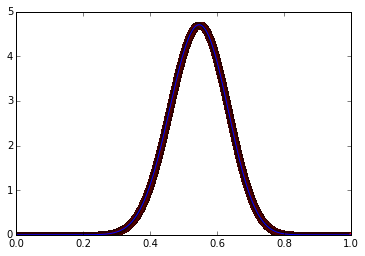

Integral de Linspace 1.000, máximo en 0.545
Integral de Random 1.000, máximo en 0.545


In [13]:
#Calculamos de diferentes formas la integral

##1) con quad usando la función definida al comienzo 
inte, error = quad(func_binomial, 0., 1.)
print 'Integral usando quad\n Integral:%f  Error:%e \n' % (inte, error)

#generamos 1000000 r entre 0 y 1 igualmente espaciados
r = np.linspace(0,1,1000000)
#Calculamos la probabilidad para cada uno de esos r
binomial = binom(33,r).pmf(18) 

#Para asegurar que no hay diferencia entre elegir r igualmente o uniforme entre 0 y 1, ahora generamos 1000000 con la última
r1 = np.sort(np.random.uniform(0,1,1000000))
#Calculamos la probabilidad para cada r generado uniformemente
binomial1 = binom(33,r1).pmf(18)

#inicializo para generar plots
fig, ax = plt.subplots()

#Calculamos las integrales usando la regla de Simpson 
integral = simps(binomial,r)
integral1 = simps(binomial1,r1) 

#Por diversión! Para mostrar que la integral se aproxima muy bien a la suma de todas las probabilidades normalizada por el número de r 
sum1 = np.sum(binomial)/len(binomial)
sum2 = np.sum(binomial1)/len(binomial1)

print 'Integral usando suma\n Linspace:%f  Random:%f \n' % (sum1, sum2)#

print 'Integral usando regla de Simpson\n Linspace:%f  Random:%f\n' % (integral,integral1) 

#Ahora podemos escribir las distribuciones (pdf)
distr = binomial/integral
distr1 = binomial1/integral1

#Vemos si está bien normalizada!
integral_distr = simps(distr,r)
integral_distr1 = simps(distr1,r1)

#Graficamos!
ax.plot(r1,distr1,'ro',r,distr,'blue')
plt.show()

print 'Integral de Linspace %.3f, máximo en %.3f'% (integral_distr, r[np.argmax(distr)] )
print 'Integral de Random %.3f, máximo en %.3f'% (integral_distr1, r1[np.argmax(distr1)] )

Ya demostramos que la pdf (pmf) está bien normalizada (para ambos casos, son indestinguibles!). Para calcular la CDF, notemos que asignamos $\mathbb{P}(-\infty \lt r \lt 0) = 0 $, por lo cual será irrelevante en la gráfica. Ahora bien, usaremos la pdf ya definida, pero ahora 'guardaremos' cada valor de la integral en el intervalo que nos interesa ($0\leq r \leq 1$):   

In [14]:
r3 = np.sort(np.random.uniform(0,1,10000))  #por 'diversión' generamos otro arreglo ya que demostramos que la pdf es correcta
binomial3 = binom(33,r3).pmf(18)
integral3 = simps(binomial3,r3)

pdf = binomial3/integral3 

cumulative1 = []
new_r = []
ind = 1 
 
#Calculamos de 2 maneras la CDF
#1) con FOR en la pdf
for i in range(len(pdf)):
    j = i%10
    if i > 0 and j==0: #Necesario para poder integrar: 'al menos dos puntos' 
       cumulative =  cumulative1[ind-1] + simps(pdf[j*10:i],r3[j*10:i])
       cumulative1.append(cumulative)
       new_r.append(r3[i]) 
       ind+=1 
    else:
       cumulative1.append(pdf[0])
       new_r.append(r3[0])
#2) Usamos la cumulativa usando el método del trapecio
cumulative2 = cumtrapz(pdf,r3,initial=pdf[0])        

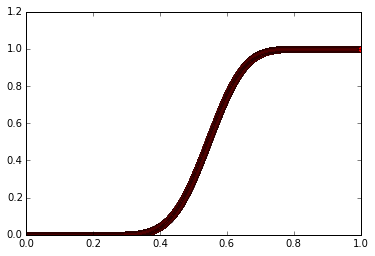

In [15]:
plt.plot(new_r,cumulative1,'bo',r3,cumulative2,'ro')
plt.show()

Nuevamente, vemos que son indestinguibles nuevamente! (los métodos alternativos funcionan). 

d) Solo debemos calcular $\mathbb{P}(r \text{ < 0.5 | }X)$ ya que $\mathbb{P}(r \text{ > 0.5 | }X)=$  $ 1 - \mathbb{P}(r \text{ < 0.5 | }X)$ . Para hacerlo, usaremos nuevamente la regla de Simpson al integrar:

In [16]:
r4 = np.linspace(0,0.5,10000) #me aseguro del límite de la CDF con linspace, pero puedo usar random como ya vimos
distr2 = binom(33,r4).pmf(18)/integral
intdi2 = simps(distr2,r4) #calculamos la integral
intmayor = 1 - intdi2
print 'Probabilidad para r < 0.5: %.3f \nProbabilidad para r > 0.5: %.3f'% (intdi2,intmayor)

Probabilidad para r < 0.5: 0.304 
Probabilidad para r > 0.5: 0.696


Lo cual es consistente con la respuesta encontrada en c), ya que el máximo de la distribución se encuentra en $r=0.545$ , es decir, que probamos que es más probable la probabilidad (valga la redundancia) que la gente escoja la opción de quedarse con su puerta! (dado $X=18$!)